<a href="https://colab.research.google.com/github/paishowstopper/TSAI/blob/main/EVA5/Session_13/Session_13_YoloV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.8.1+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


In [3]:
cd 'drive/MyDrive/EVA_Session_13'

/content/drive/MyDrive/EVA_Session_13


In [4]:
!ls

 annotation_tool   output	  results.txt	    train_batch0.png    weights
 cfg		   __pycache__	  runs		    train.py
 data		   README.md	  test_batch0.png  'ubdivisions=1'
 detect.py	   results.json   test.py	    utils
 models.py	   results.png	  ting		    vim.exe.stackdump


In [5]:
!python train.py --data data/smalcoco/smalcoco.data --batch 10 --cache --epochs 25 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', device='', epochs=25, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

2021-05-15 16:13:24.492632: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:06<00:00,  3.16it/s]
Caching images (0.0GB): 100% 20/20 [00:08<00:00,  2.24it/s]
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 954.60it/s]


In [6]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 3

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=3, evolve=False, img_size=[512], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

2021-05-15 16:16:18.890050: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
Caching labels (3034 found, 131 missing, 38 empty, 0 duplicate, for 3203 images): 100% 3203/3203 [11:44<00:00,  4.55it/s]
Caching images (1.8GB): 100% 3203/3203 [16:35<00:00,  3.22it/s]
Caching labels (297 found, 14 missing, 7 empty, 0 duplicate, for 318 images): 100% 318/318 [01

In [7]:
!python detect.py --conf-thres 0.1 --output out_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='data/customdata/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
image 1/3610 data/customdata/images/01-prince-boots - Copy.jpg: 512x448 1 masks, 3 bootss, Done. (0.044s)
image 2/3610 data/customdata/images/026f0ffddc.jpg: 384x512 1 vests, 1 masks, Done. (0.037s)
image 3/3610 data/customdata/images/032620_LS_covid-masks_inline-680.jpg: 320x512 1 hardhats, 1 masks, Done. (0.033s)
image 4/3610 data/customdata/images/046acbc8e1.jpg: 384x512 1 vests, 1 masks, Done. (0.036s)
image 5/3610 data/customdata/images/050bdc8229cf18030e2d8a266dd334af84-23-chelsea-boots.rsquare.w1200 - Copy.jpg: 512

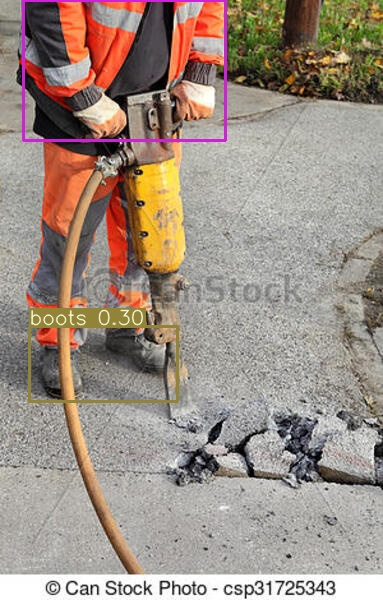

In [9]:
Image(filename='out_out/img_070.jpg', width=600)

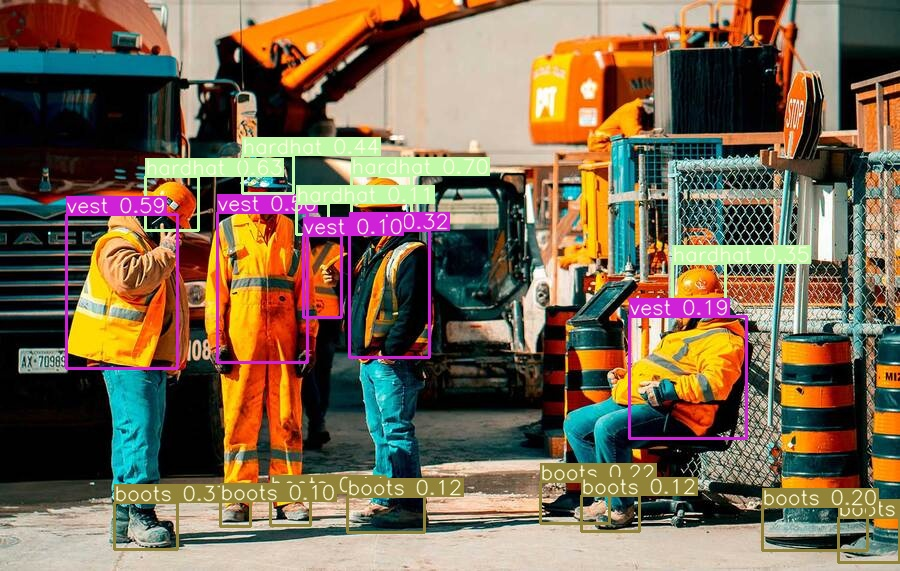

In [10]:
Image(filename='out_out/img_095.jpg', width=600)

In [11]:
!apt install ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [21]:
cd ../../

/content/drive/My Drive/EVA_Session_13


In [22]:
ls

 annotation_tool/   output/        runs/             'ubdivisions=1'
 cfg/               __pycache__/   test_batch0.png    utils/
 data/              README.md      test.py            vim.exe.stackdump
 detect.py          results.json   ting               weights/
 models.py          results.png    train_batch0.png
 out_out/           results.txt    train.py


In [19]:
!ffmpeg -i Video.mp4 image-%03d.png

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [25]:
!python detect.py --conf-thres 0.1 --source data/video/ --output out_video

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_video', save_txt=False, source='data/video/', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
image 1/1260 data/video/image-001.png: 320x512 Done. (0.033s)
image 2/1260 data/video/image-002.png: 320x512 Done. (0.029s)
image 3/1260 data/video/image-003.png: 320x512 Done. (0.029s)
image 4/1260 data/video/image-004.png: 320x512 Done. (0.029s)
image 5/1260 data/video/image-005.png: 320x512 Done. (0.027s)
image 6/1260 data/video/image-006.png: 320x512 Done. (0.027s)
image 7/1260 data/video/image-007.png: 320x512 Done. (0.027s)
image 8/1260 data/video/image-008.png: 320x512 Done. (0.026s)
image 9/1260 data/video/image-009.png: 3

In [31]:
cd out_video/

/content/drive/My Drive/EVA_Session_13/out_video


In [32]:
!ls

image-001.png	image-113.png	image-244.png  image-496.png  image-748.png
image-002.png	image-1140.png	image-245.png  image-497.png  image-749.png
image-003.png	image-1141.png	image-246.png  image-498.png  image-750.png
image-004.png	image-1142.png	image-247.png  image-499.png  image-751.png
image-005.png	image-1143.png	image-248.png  image-500.png  image-752.png
image-006.png	image-1144.png	image-249.png  image-501.png  image-753.png
image-007.png	image-1145.png	image-250.png  image-502.png  image-754.png
image-008.png	image-1146.png	image-251.png  image-503.png  image-755.png
image-009.png	image-1147.png	image-252.png  image-504.png  image-756.png
image-010.png	image-1148.png	image-253.png  image-505.png  image-757.png
image-011.png	image-1149.png	image-254.png  image-506.png  image-758.png
image-012.png	image-114.png	image-255.png  image-507.png  image-759.png
image-013.png	image-1150.png	image-256.png  image-508.png  image-760.png
image-014.png	image-1151.png	image-257.png  image-509

In [34]:
!ffmpeg -i image-%03d.png video.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib